In [1]:
2 + 2

4

In [2]:
1 + 2

3

In [3]:
'+'.join("abc")

'a+b+c'

Прочитать текст из файла, вывести
список слов. Несколько строчек на NLTK.

До 9-45.

In [15]:
import numpy as np

# создание массива
l = ["abc", "aaaa", "fffda"]
a = np.array([10, 20, 30])
a = np.array([len(word) for word in l])
print(a)
b = np.array([len(word) for word in l])
print(b)

[3 4 5]
[3 4 5]


In [17]:
# сделать вычисление со всеми элементами
# массива. В python - цикл. В numpy -
# одна операция
alog = np.log10(a)
print(alog)
blog = np.log10(b)
print(blog)

[0.47712125 0.60205999 0.69897   ]
[0.47712125 0.60205999 0.69897   ]


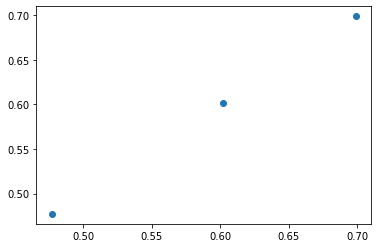

In [20]:
from matplotlib import pyplot

# o означает рисование точек
pyplot.plot(alog, blog, 'o')

In [35]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


# 9:10 - 10:40
# 11:00 - 12:30


3.999999999999999
[1.03]


# Линейная регрессия

У нас есть набор точек, которые лежат
примерно на одной прямой. Хотим восстановить
эту прямую.

Вообще, это задача машинного обучения.
Даны значения x и y
x - это log(rank), y - это log(частоты)
Хотим по x (по rank) определять y (частоту)
слова в конкретном тексте. Если нужно обучаться
угадывать число, то это называется задачей
регресии. (еще бывает задача классификации,
угадываем класс - т.е. один из элементов мн-ва)

Задача линейной регрессии формулируетя так:
y = b + k * x + err(случайная ошибка)
чтобы угадать y, надо вычислить линейную ф-ию.
Необходимо подобрать b, k, чтобы вероятность
получить именно те y, которые у нас, была бы
максимальна.
Можно переформулировать проще (если err
нормально распределены), мы хотим, чтобы
сумма квадратов ошибок была минимальна.

In [84]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = 1
b = 5
y = b + k*x
print(x, y)

y = y + np.random.normal(0, 0.4, len(x))

[ 1  2  3  4  5  6  7  8  9 10] [ 6  7  8  9 10 11 12 13 14 15]


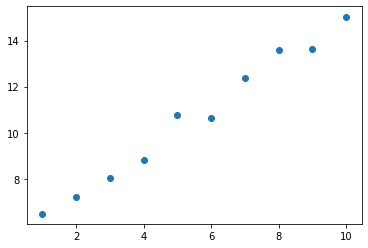

In [85]:
from matplotlib import pyplot as pp

pp.scatter(x, y)

In [86]:
# используем scikit-learn библиотеку
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# reg будет решать задачу, подбирать k, b
# в fit передаем данные для обучения. x, y
# x должен быть двумерным, потому что
# y = b + k1*x1 + k2*x2 + ... + kn*xn + err
X = x.reshape(-1, 1)
reg.fit(X, y)
print('k = ', reg.coef_)
print('b = ', reg.intercept_)

k =  [0.96989245]
b =  5.326809262856059


In [87]:
print(x)
print(x.reshape(-1, 1))

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [88]:
# попробуем нарисовать. Нужно вычислить k*x + b
# reg.coef_ * x + reg.intercept_
yPred = reg.predict(X)
print(yPred)

[ 6.29670171  7.26659416  8.2364866   9.20637905 10.17627149 11.14616394
 12.11605639 13.08594883 14.05584128 15.02573372]


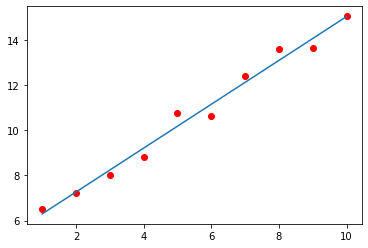

In [91]:
pyplot.plot(x, y, 'or', x, yPred)